## Practice: Truth, Lies and Overconfidence

In this exercise, we'll return to some data from the Modal Times to help them understand their subscriber demographics.

### Population Distribution

Let's imagine for a moment that we're all powerful and have access to any information or data we'd like, including data that would be un-collectable in the real world!

The modal times is interested in understanding how old their subscriber base is. This will help them better understand how to market their product. As all powerful beings, we can inspect the ages (on the day that they first subscribed) of all people who subscribed to the Modal Times last year. Let's start by taking a look at this population distribution.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
print('The libraries are loaded')

Matplotlib is building the font cache; this may take a moment.


The libraries are loaded


In [2]:
# Load the population of ages
pop_ages = np.genfromtxt('ages_population.txt')

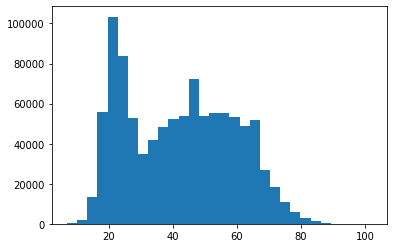

In [3]:
# Visualize the population distribution
plt.hist(pop_ages, bins=30)
plt.show()

One question we might have is: what is the average age of a Modal times subscriber? To answer this question, let's calculate the average age in this population. 

In [4]:
# Calculate the mean age of the subscribers
true_population_mean = np.mean(pop_ages)
true_population_mean

42.022225

### Sample Distribution

Now, let's imagine we are a researcher. We don't have access to the ages of all people who subscribed to the Modal Times last year. Lots of people didn't fill out their birthdays when they signed up!

However, we do have a random sample of 100 subscribers for whom we made sure to collect this information. Let's take a look at that sample.

In [5]:
# Load the sample ages
samp_ages = np.genfromtxt('ages_sample.txt')

Let's inspect the sample distribution and calculate the sample mean.

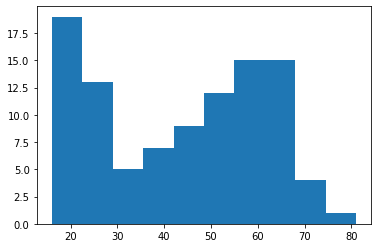

In [6]:
# Inspect the sample distribution
plt.hist(samp_ages)
plt.show()

In [7]:
# Calculate the sample mean
sample_mean = np.mean(samp_ages)
sample_mean

43.55

Our sample mean is 43.55. As all powerful beings, we know that this number is a little higher than the true population mean. But as researchers, we can't know that! 

Still, the researcher can estimate a confidence interval around this number, which indicates how sure they are that their sample mean is representative of the entire population.

### Sampl-ING Distribution of the Mean

The sampling distribution of the mean is the distribution of sample means from infinitely many random samples drawn from a population. We can simulate it by randomly sampling a large number of samples from a population; OR, we can use the central limit theorem to figure out what it should look like.

For now, let's imagine that we're all powerful again, and have access to the full population of ages.

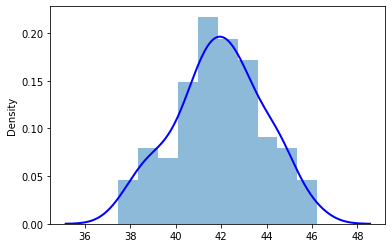

In [8]:
# Simulate the sampling distribution
np.random.seed(1)
samp_dist = []
s = len(samp_ages) # sample size
niter = 100 # number of iterations (any large number works)

for i in range(niter):
    samp = np.random.choice(pop_ages, s, replace=False)
    samp_dist.append(np.mean(samp))

plt.hist(samp_dist, density=True, alpha=.5)
sns.kdeplot(samp_dist, lw=2, label='Simulated', color='blue')
plt.show()

The Central Limit Theorem (CLT) actually tells us what this simulated curve should look like: It should be normally distributed with mean equal to the population mean and standard deviation equal to the population standard deviation divided by the square root of the sample size.

In [9]:
# Calculate sample size, sample mean, and standard error
sample_size = len(samp_ages)
mean_samp_dist = true_population_mean
standard_error = np.std(pop_ages)/np.sqrt(sample_size)

Now, we can superimpose the expected distribution (based on the CLT) on top of the simulated one to see how similar they are.

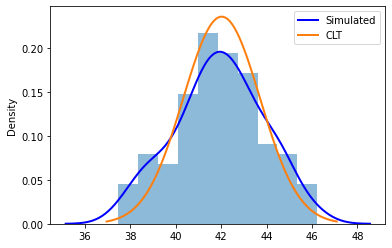

In [10]:
# Calculate the mean and standard deviation (standard error)
plt.hist(samp_dist, density=True, alpha=.5)
sns.kdeplot(samp_dist, lw=2, label='Simulated', color='blue')
x = np.linspace(mean_samp_dist - 3*standard_error, mean_samp_dist + 3*standard_error, 100)
plt.plot(x, st.norm.pdf(x, mean_samp_dist, standard_error), lw=2, label='CLT')
plt.legend()
plt.show()

Based on this picture, we can see that most of the simulated sample means are between 38 and 46 (or within 4 years from the true sample mean). We can calculate the 2.5th and 97.5th percentiles of the simulated data or the percentiles of the true CLT-based sampling distribution.

In [11]:
# Calculate percentiles of simulated sampling distribution
low_bound_sim = np.percentile(samp_dist, 2.5)
high_bound_sim = np.percentile(samp_dist, 97.5)

print('2.5th percentile: ', low_bound_sim)
print('97.5th percentile: ', high_bound_sim)

2.5th percentile:  38.25
97.5th percentile:  45.405249999999995


In [12]:
# Calculate the true percentiles using the CLT
low_bound = st.norm.ppf(.025, loc = mean_samp_dist, scale = standard_error)
high_bound = st.norm.ppf(.975, loc = mean_samp_dist, scale = standard_error)

print('2.5th percentile: ', low_bound)
print('97.5th percentile: ', high_bound)

2.5th percentile:  38.71310222645504
97.5th percentile:  45.331347773544955


### 95% Confidence Interval: Researcher Mode

As the researcher, we can't simulate the sampling distribution like we did above. We also don't know the population mean or standard deviation; however, we CAN estimate both using the sample mean and standard deviation. This helps us understand how sure can we be that our sample mean is close to the true population mean.

In [13]:
# Estimated standard error
sample_size = len(samp_ages)
sample_mean = np.mean(samp_ages)
sample_sd = np.std(samp_ages, ddof=1)

estimated_standard_error = sample_sd/np.sqrt(sample_size)
estimated_standard_error

1.7679169389511213

In [14]:
# Estimated 95% confidence interval
low_bound_est = st.norm.ppf(.025, loc = sample_mean, scale = estimated_standard_error)
high_bound_est = st.norm.ppf(.975, loc = sample_mean, scale = estimated_standard_error)

print('Sample Mean: ', sample_mean)
print('Lower bound: ', low_bound_est)
print('Upper bound: ', high_bound_est)

Sample Mean:  43.55
Lower bound:  40.0849464719975
Upper bound:  47.01505352800249


Based on this data, the researcher would report that the mean age in the 100-person sample was 43.55, with a 95% confidence interval of 40.1 - 47.0. 

In other words, the researcher is 95% confident that the true population mean is somewhere in the range of 40.1 - 47.0.

### Confidence Interval for a Proportion

So far in this practice, we've used the CLT to calculate a 95% confidence interval around a sample mean. We can also calculate confidence intervals around other sample statistics, like a sample median or proportion. All we need to know is how to estimate the sampling distribution for that statistic!

It actually turns out that the sampling distribution for a proportion is approximately the same as for a sample mean! The reason is that we can represent a binary categorical variable as 1s and 0s, where the average of those values gives us the proportion of 1s in the sample.

For example, suppose we have a sample of subscribers who have either opted into a student discount (denoted with a `1`) or not (denoted with a `0`). Let's load the data and then calculate the proportion with student discounts.

In [15]:
# Load the sample of student discount flags
stud_disc = np.genfromtxt('student_discounts_sample.txt')

# Print the first 5 values
stud_disc[0:5]

array([0., 0., 0., 1., 0.])

In [16]:
# Calculate the proportion of 1s
sample_p = np.mean(stud_disc)
sample_p

0.22943722943722944

So, 22.9% of the subscribers in our sample have opted into a student discount. 

Now, let's calculate a 95% confidence interval around this value. Even though we are interpreting it as the proportion of subscribers with a student discount, we calculated it by using the mean. The sampling distribution for this proportion is:

- Approximately normally distributed (approximate because it is actually a discrete distribution)
- Has a mean equal to the population proportion (p)
- Has a standard deviation (standard error) equal to sqrt(p*(1-p)/n). 

In fact, sqrt(p*(1-p)/n) is just a simplified way of writing the same formula that we used for the standard error of the sample mean: sd/sqrt(n). Let's see that in action!

In [17]:
# Calculate sample size
n = len(stud_disc)

# Calculate standard error both ways
std_err1 = np.sqrt(sample_p*(1-sample_p)/n)
std_err2 = np.std(stud_disc)/np.sqrt(n)

# Print out both calculations to show they are the same
print(std_err1)
print(std_err2)

0.02766495487209972
0.02766495487209972


Therefore, using a similar process to the one we used earlier, we can calculate a 95% confidence interval around this sample proportion as follows:

In [18]:
# Estimated 95% confidence interval
low_bound_est = st.norm.ppf(.025, loc = sample_p, scale = std_err1)
high_bound_est = st.norm.ppf(.975, loc = sample_p, scale = std_err1)

print('Sample proportion: ', sample_p)
print('Lower bound: ', low_bound_est)
print('Upper bound: ', high_bound_est)

Sample proportion:  0.22943722943722944
Lower bound:  0.17521491425398808
Upper bound:  0.28365954462047077


## Practice on Your Own

Following the prompts below, you'll construct confidence intervals for two other demographic characteristics that were collected for this sample: salary in thousands of dollars per year and subscription type (`1` if yearly, `0` if monthly). Run the cell below to load the data, then follow the prompts to calculate confidence intervals for mean salary and proportion of yearly subscribers.

In [20]:
# Load samples of salary and subscription type
salary_sample = np.genfromtxt('salary_sample.txt')
yearly_subscription = np.genfromtxt('yearly_subscriptions_sample.txt')

#### 1. Calculate the mean salary for the provided sample (`salary_sample` )

In [22]:
# 1
###
sample_mean = np.mean(salary_sample)
sample_mean
###


50.31022617182918

#### 2. Calculate a 95% confidence interval for `salary_sample` .

In [26]:
# 1
###
n = len(salary_sample)
std_error = np.std(salary_sample)/np.sqrt(n)

low_bound_est = st.norm.ppf(.025, loc = sample_mean, scale = std_error)
high_bound_est = st.norm.ppf(.975, loc = sample_mean, scale = std_error)

print('Sample mean: ', sample_mean)
print('Lower bound: ', low_bound_est)
print('Upper bound: ', high_bound_est)
###


Sample mean:  50.31022617182918
Lower bound:  47.331898509043285
Upper bound:  53.28855383461507


#### 3. Calculate a 99% confidence interval for `salary_sample`.

In [27]:
# 3
###
low_bound_est = st.norm.ppf(.005, loc = sample_mean, scale = std_error)
high_bound_est = st.norm.ppf(.995, loc = sample_mean, scale = std_error)

print('Sample mean: ', sample_mean)
print('Lower bound: ', low_bound_est)
print('Upper bound: ', high_bound_est)
###


Sample mean:  50.31022617182918
Lower bound:  46.39604013071448
Upper bound:  54.224412212943875


#### 4. Calculate the proportion of subscribers who have a yearly subscription in the provided sample (`yearly_subscription` ).

In [32]:
# 4
###
n = len(yearly_subscription)
proportion = np.mean(yearly_subscription)
std_error =  np.sqrt(proportion*(1-proportion)/n)
###


#### 5. Calculate a 95% confidence interval for `yearly_subscription`.

In [33]:
# 5
###
low_bound_est = st.norm.ppf(.025, loc = proportion, scale = std_error)
high_bound_est = st.norm.ppf(.975, loc = proportion, scale = std_error)

print('Sample mean: ', proportion)
print('Lower bound: ', low_bound_est)
print('Upper bound: ', high_bound_est)
###


Sample mean:  0.3127962085308057
Lower bound:  0.25023856558495755
Upper bound:  0.37535385147665384
